In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\df_all.csv")


In [3]:
df_all = pd.read_csv('C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Paper1-Release\\Output\\Long-Test\\Features\\Features_Long-Test.csv')

df_all['BaseChange'] = 0
df_all['FracChange'] = 0
df_all['ValueRS'] = 0
df_all['Group'] = df_all['Feature'].str.split('_').str[0]
df_all['Feature'] = df_all['Feature'].str.split('_').str[1]

patIDs = df_all['PatID'].unique()

df_volume = df_all.loc[df_all['Feature'] == 'MeshVolume']
df_volume = df_volume.loc[df_volume['ContourType'] == 'Manual']
for pat in patIDs:
    df_temp = df_volume[df_volume['PatID'] == pat]

    #df_temp['FeatureChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0]
    # make Feature change as a percentage of the first value

    df_temp['BaseChange'].iloc[0] = 0
    df_temp['ValueRS'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].mean()) / df_temp['FeatureValue'].std()
    for i in range(1, len(df_temp)):
        if i == 1:
            df_temp['FracChange'].iloc[i] = 0
            df_temp['BaseChange'].iloc[i] = 0
        else:
            df_temp['BaseChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0] 
            df_temp['FracChange'].iloc[i] = df_temp['FeatureValue'].iloc[i] - df_temp['FeatureValue'].iloc[i-1] / df_temp['FeatureValue'].iloc[i-1]
    # merge back in to df_fo
    df_volume.loc[df_volume['PatID'] == pat, 'BaseChange'] = df_temp['BaseChange']
    df_volume.loc[df_volume['PatID'] == pat, 'FracChange'] = df_temp['FracChange']
    df_volume.loc[df_volume['PatID'] == pat, 'ValueRS'] = df_temp['ValueRS']

    df_signal = df_all.loc[df_all['Feature'] == 'Median']


    print(pat)
    print(df_temp)
df_volume['BaseChange'] = df_volume['BaseChange'].abs()
# df_volume = df_volume.groupby(['Fraction']).median()
df_volume = df_volume.reset_index()
df_volume['BaseChange'] = df_volume["BaseChange"] + 1

df_signal['BaseChange'] = df_signal['BaseChange'].abs()
df_signal = df_signal.groupby(['Fraction']).median()
df_signal = df_signal.reset_index()
df_signal['BaseChange'] = df_signal["BaseChange"] + 1

1642
     Unnamed: 0  PatID  Fraction Contour ContourType     Feature  \
8             8   1642         1      RP      Manual  MeshVolume   
115         115   1642         2      RP      Manual  MeshVolume   
222         222   1642         3      RP      Manual  MeshVolume   
329         329   1642         4      RP      Manual  MeshVolume   
436         436   1642         5      RP      Manual  MeshVolume   

     FeatureValue  BaseChange   FracChange   ValueRS  Group  
8     16748.68403    0.000000      0.00000 -1.662155  shape  
115   22840.58241    0.363724      0.00000  0.959819  shape  
222   21474.71290    0.282173  21473.71290  0.371944  shape  
329   21570.69182    0.287904  21569.69182  0.413254  shape  
436   20418.01879    0.219082  20417.01879 -0.082861  shape  
1029
       Unnamed: 0  PatID  Fraction Contour ContourType     Feature  \
15523           8   1029         1      RP      Manual  MeshVolume   
15630         115   1029         2      RP      Manual  MeshVolume   

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [119]:
df_volume = df_volume[['PatID','Fraction', 'FeatureValue', 'ValueRS', 'BaseChange', 'FracChange']]
df_volume.to_csv('..\\TestData\\Man_Volume.csv')


In [4]:
frac1 = df_volume.loc[df_volume['Fraction'] == 1]['BaseChange'].values
frac1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

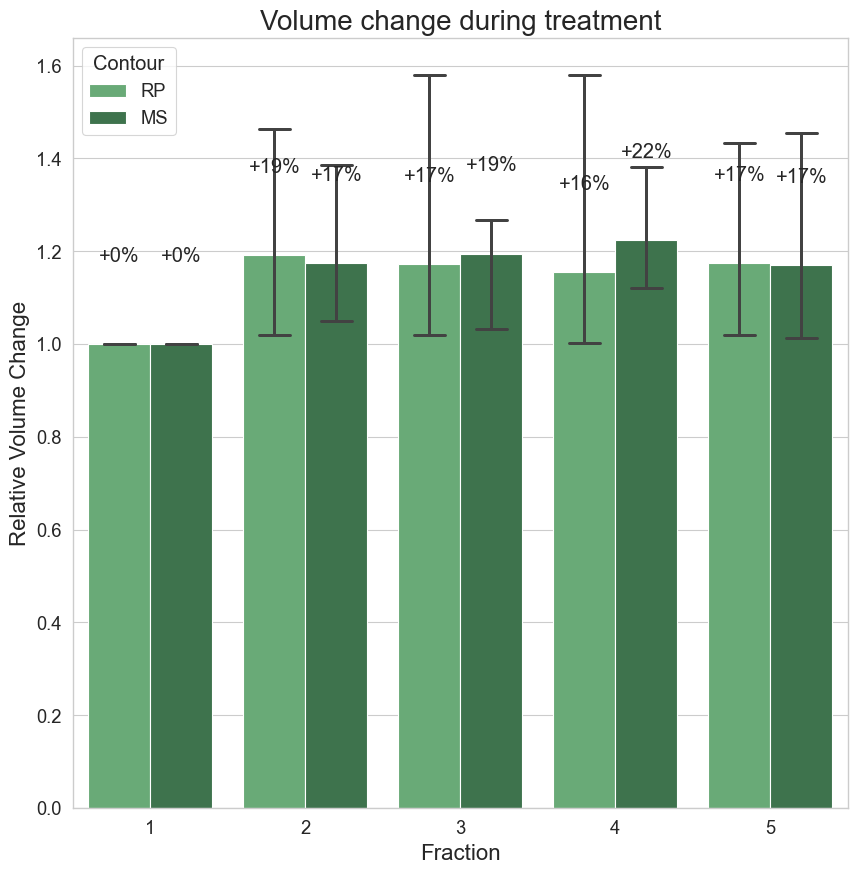

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Volume change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
# ax_set = ax.set(ylim=(0.9, 1.3))


sns.barplot(x='Fraction', y='BaseChange', palette = 'Greens_d', hue = 'Contour', data=df_volume, ax=ax, estimator=np.median, errorbar=('pi', 95), capsize=.2)
# sns.barplot(x='Fraction', y='BaseChange', palette = 'Reds_d', data=df_signal, ax=ax)
ax.set_ylabel('Relative Volume Change', fontsize=16)

# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.16),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# sns.despine()

In [78]:
df_volume

,Unnamed: 0,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,BaseChange,FracChange,ValueRS,Group
8,8,1642,1,RP,Manual,MeshVolume,16748.68403,0.000000,0.00000,-0.178189,shape
115,115,1642,2,RP,Manual,MeshVolume,22840.58241,0.363724,0.00000,1.412147,shape
222,222,1642,3,RP,Manual,MeshVolume,21474.71290,0.282173,21473.71290,1.055576,shape
329,329,1642,4,RP,Manual,MeshVolume,21570.69182,0.287904,21569.69182,1.080632,shape
436,436,1642,5,RP,Manual,MeshVolume,20418.01879,0.219082,20417.01879,0.779719,shape
...,...,...,...,...,...,...,...,...,...,...,...
20873,8,1303,1,MS,Manual,MeshVolume,9887.62323,0.486944,9886.62323,-0.219869,shape
20980,115,1303,2,MS,Manual,MeshVolume,12665.42750,0.904682,12664.42750,0.929923,shape
21087,222,1303,3,MS,Manual,MeshVolume,11577.88819,0.741133,11576.88819,0.479768,shape
21194,329,1303,4,MS,Manual,MeshVolume,12746.62040,0.916892,12745.62040,0.963531,shape


Text(0, 0.5, 'Relative Change')

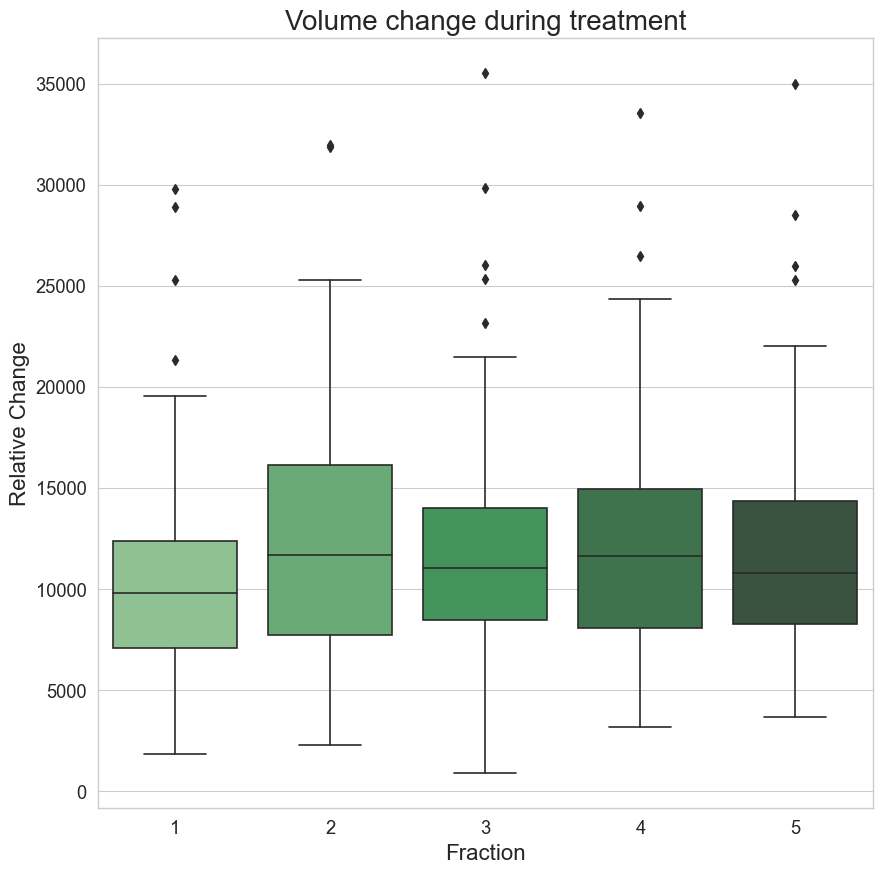

In [121]:
fig, ax = plt.subplots(figsize=(10, 10))

# box plot
ax.set_title('Volume change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
# ax_set = ax.set(ylim=(0.9, 1.3))


sns.boxplot(x='Fraction', y='FeatureValue', palette = 'Greens_d', data=df_volume, ax=ax)
# sns.barplot(x='Fraction', y='BaseChange', palette = 'Reds_d', data=df_signal, ax=ax)
ax.set_ylabel('Relative Change', fontsize=16)


# sns.despine()

In [40]:
df_plot = df_signal.copy()

df_plot.reset_index(inplace=True)
df_plot



,index,Fraction,Unnamed: 0,PatID,FeatureValue,BaseChange,FracChange,ValueRS
0,0,1,23,1210,52.0,1.000000,14.5,-0.989524
1,1,2,130,1210,61.5,1.206207,19.5,0.603708
2,2,3,237,1210,61.0,1.254412,60.0,0.610820
3,3,4,344,1210,58.5,1.239733,57.5,0.137371
4,4,5,451,1210,50.5,1.131944,49.5,-0.570760


In [108]:
df_signal = df_all[df_all['Feature'] == 'Median']

df_signal

,Unnamed: 0,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,BaseChange,FracChange,ValueRS,Group
23,23,1642,1,RP,Manual,Median,56.0,0,0,0,firstorder
130,130,1642,2,RP,Manual,Median,75.0,0,0,0,firstorder
237,237,1642,3,RP,Manual,Median,66.0,0,0,0,firstorder
344,344,1642,4,RP,Manual,Median,63.0,0,0,0,firstorder
451,451,1642,5,RP,Manual,Median,56.0,0,0,0,firstorder
...,...,...,...,...,...,...,...,...,...,...,...
20888,23,1303,1,MS,Manual,Median,51.0,0,0,0,firstorder
20995,130,1303,2,MS,Manual,Median,60.0,0,0,0,firstorder
21102,237,1303,3,MS,Manual,Median,55.0,0,0,0,firstorder
21209,344,1303,4,MS,Manual,Median,61.0,0,0,0,firstorder


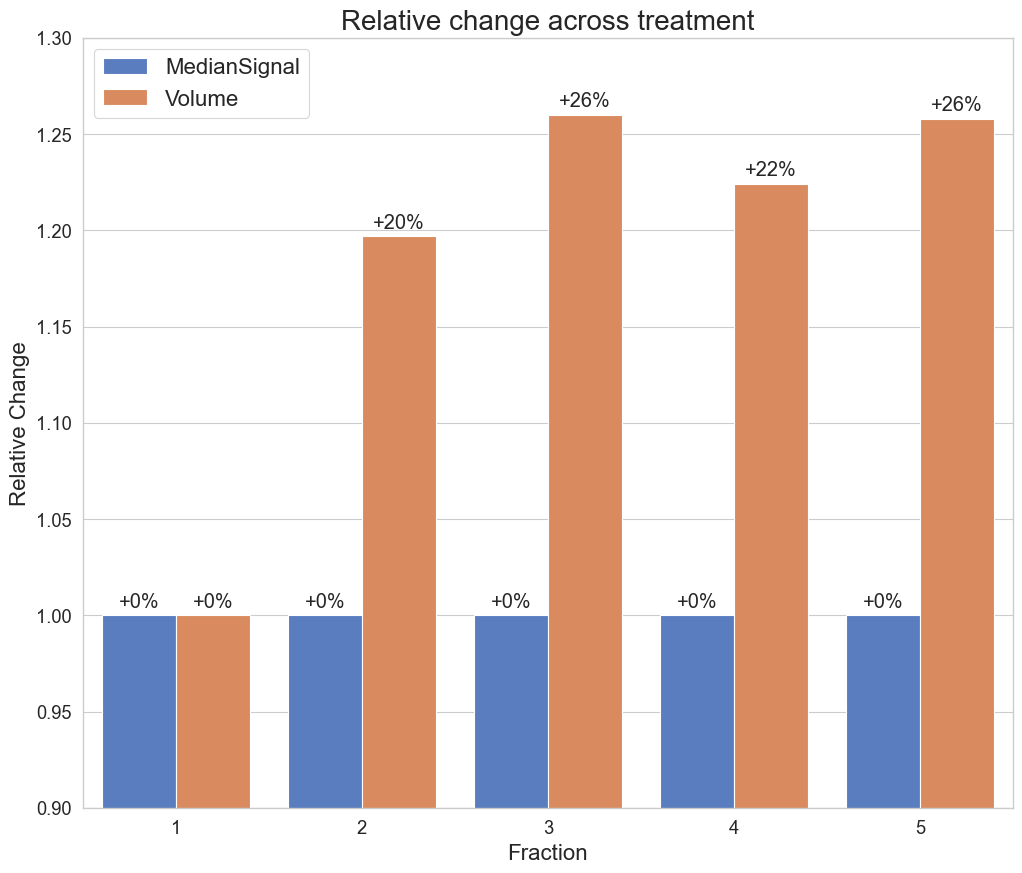

In [105]:
vals_sig = df_signal['BaseChange'].values
vals_vol = df_volume['BaseChange'].values
vals_vol[0] = 1
vals_frac = df_volume['Fraction'].values
# make new df
df_bar = pd.DataFrame({'MedianSignal': vals_sig, 'Volume': vals_vol, 'Fraction': vals_frac})

df_bar = df_bar.melt(id_vars=['Fraction'], var_name='Type', value_name='BaseChange')

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='Fraction', y='BaseChange', hue='Type', data=df_bar, palette='muted')
ax.set_xlabel('Fraction', fontsize=16)
ax_set = ax.set(ylim=(0.9, 1.3))


# sns.barplot(x='Fraction', y='BaseChange', palette = 'Greens_d', data=df_volume, ax=ax)
#sns.barplot(x='Fraction', y='BaseChange', palette = 'Reds_d', data=df_signal, ax=ax)
ax.set_ylabel('Relative Change', fontsize=16)
ax.set_xlabel('Fraction', fontsize=16)
ax.set_title('Relative change across treatment', fontsize=20)
ax.legend(loc='upper left', fontsize=16)

# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

